<a href="https://colab.research.google.com/github/bryanMontoya/machineLearning/blob/main/XGBoost2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from random import randint
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

RSHAPED = 784

In [ ]:
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


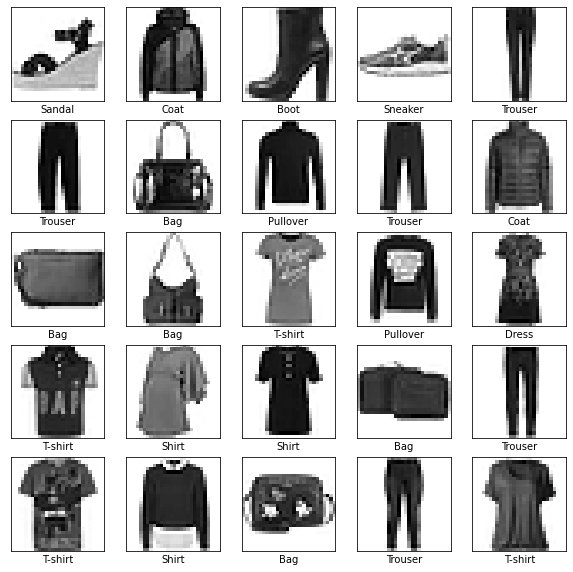

In [ ]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  n = randint(0, X_train.shape[0]-1)
  plt.imshow(X_train[n], cmap = plt.cm.binary) #Graficar imagenes
  plt.xlabel(class_names[y_train[n]])

Pasar las imágenes a vectores.

In [ ]:
X_train = X_train.reshape(60000, RSHAPED)
X_test = X_test.reshape(10000, RSHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
xgb_model = XGBClassifier(n_estimators = 88, max_depth = 3, objetivo = 'biinary:logistic', nthread = 4, seed = 27, scale_pos_weight = 1)
start_time = time.time()
xgb_model.fit(X_train, y_train, verbose = True)
print('Tiempo de ejecución %s en segundos'%(time.time() - start_time))

Tiempo de ejecución 700.4677622318268 en segundos


In [ ]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred, ))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.74      0.76      0.75      1000
           3       0.85      0.89      0.87      1000
           4       0.74      0.77      0.75      1000
           5       0.97      0.93      0.95      1000
           6       0.67      0.57      0.62      1000
           7       0.91      0.93      0.92      1000
           8       0.95      0.96      0.95      1000
           9       0.92      0.95      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.85      0.86      0.85     10000
weighted avg       0.85      0.86      0.85     10000

[[834   0   9  44   8   1  89   0  15   0]
 [  5 957   5  25   3   0   3   0   2   0]
 [ 15   0 758  10 139   0  72   0   6   0]
 [ 27   6  13 890  28   0  34   0   2   0]
 [  0   1 112  40 774   0  71   0   2   0]
 [  0   0   0   1   0 932 

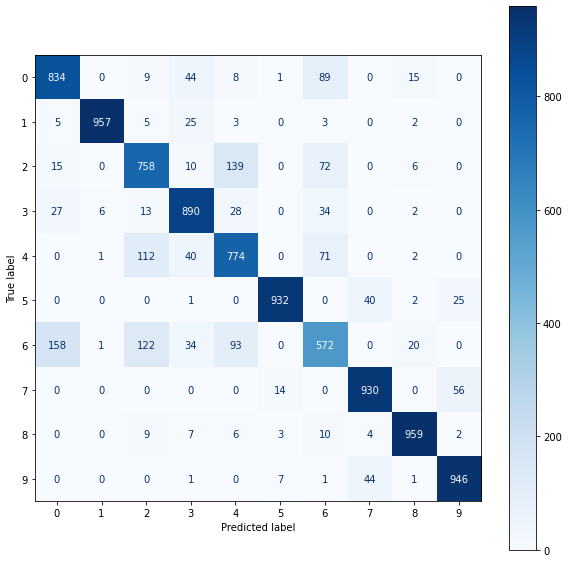

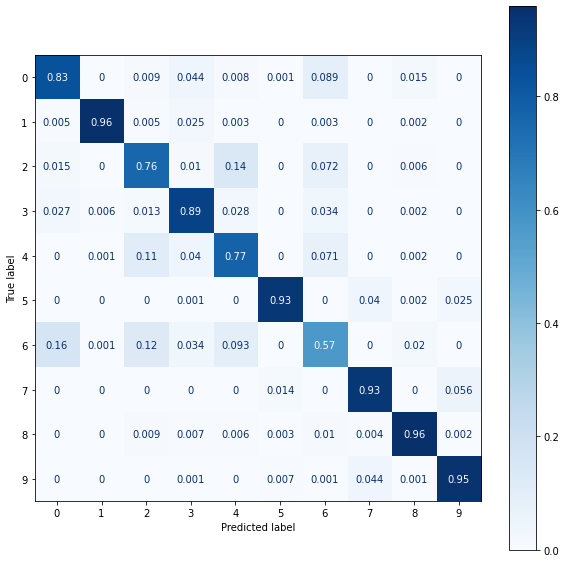

In [ ]:
_, ax = plt.subplots(figsize = (10,10))
plot_confusion_matrix(xgb_model, X_test, y_test, cmap = plt.cm.Blues, ax = ax, values_format = '.0f');
_, ax = plt.subplots(figsize = (10,10))
plot_confusion_matrix(xgb_model, X_test, y_test, cmap = plt.cm.Blues, ax = ax, normalize = 'true');

Representar datos de test.

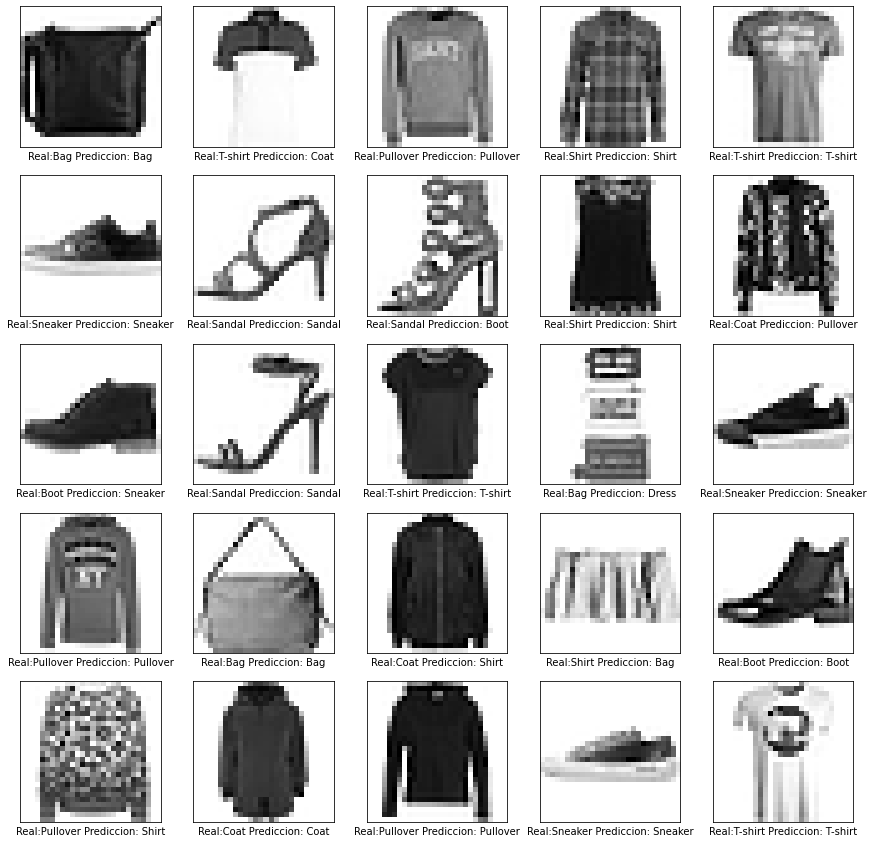

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
plt.figure(figsize = (15,15))
for i in range(25):
  plt.subplot(5,5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  n = randint(0, X_test.shape[0]-1)
  plt.imshow(X_test[n], cmap = plt.cm.binary) #Graficar imagenes
  plt.xlabel('Real:' + class_names[y_test[n]] + ' Prediccion: ' + class_names[y_pred[n]])